# Import Libraries and Load Dataset

In [12]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if you haven't already
nltk.download('stopwords')

# Load the English Yusuf Ali translation dataset
quran_df = pd.read_csv('/Users/akhan/Documents/WGU Capstopne/archive/en.yusufali.csv')


[nltk_data] Downloading package stopwords to /Users/akhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Filter the dataset for Surah 19 (Maryam) - The chapter of Mary in the Quran

In [13]:
surah_maryam_df = quran_df[quran_df['Surah'] == 19]

# Display the first few rows of Surah Maryam
surah_maryam_df.head()

,Surah,Ayah,Text
2250,19,1,Kaf. Ha. Ya. 'Ain. Sad.
2251,19,2,(This is) a recital of the Mercy of thy Lord t...
2252,19,3,"Behold! he cried to his Lord in secret,"
2253,19,4,"Praying: ""O my Lord! infirm indeed are my bone..."
2254,19,5,"""Now I fear (what) my relatives (and colleague..."


# Join all verses into one text for Surah Maryam

In [14]:

surah_text = ' '.join(surah_maryam_df['Text'].values)

# Display a sample of the combined text
print(surah_text[:500])  # Display the first 500 characters


Kaf. Ha. Ya. 'Ain. Sad. (This is) a recital of the Mercy of thy Lord to His servant Zakariya. Behold! he cried to his Lord in secret, Praying: "O my Lord! infirm indeed are my bones, and the hair of my head doth glisten with grey: but never am I unblest, O my Lord, in my prayer to Thee! "Now I fear (what) my relatives (and colleagues) (will do) after me: but my wife is barren: so give me an heir as from Thyself,- "(One that) will (truly) represent me, and represent the posterity of Jacob; and ma


# Organize our data: Join all verses into one text for Surah Maryam, Combine all verses of Surah Maryam into a single text, Clean the text: remove punctuation and convert to lowercase and more...

In [21]:
# Filter for Surah Maryam (Surah 19)
surah_maryam_df = quran_df[quran_df['Surah'] == 19]

# Combine all verses of Surah Maryam into a single text
surah_text = ' '.join(surah_maryam_df['Text'].values)

# Clean the text: remove punctuation and convert to lowercase
clean_text = re.sub(r'[^\w\s]', '', surah_text).lower()

# Split the text into individual words
words = clean_text.split()

# Replace 'allah' with 'Allah' (this is the added part)
clean_words = ['Allah' if word == 'allah' else word for word in words]

# Remove stop words (common words such as 'the', 'and')
stop_words = set(stopwords.words('english'))
clean_words = [word for word in clean_words if word not in stop_words]

# Display the cleaned word list to ensure everything looks good
print(clean_words[:10])  # Display the first 10 cleaned words

# Perform word frequency analysis
word_freq = Counter(clean_words)

# Display the top 10 most common words
print(word_freq.most_common(10))

# Generate a word cloud
clean_text_joined = ' '.join(clean_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text_joined)


['kaf', 'ha', 'ya', 'sad', 'recital', 'mercy', 'thy', 'lord', 'servant', 'zakariya']
[('Allah', 26), ('lord', 23), ('shall', 21), ('gracious', 17), ('thou', 15), ('thy', 14), ('thee', 13), ('said', 12), ('day', 12), ('son', 10)]


# Count the frequency of words in Surah Maryam

In [22]:
# Count the frequency of words in Surah Maryam
word_freq = Counter(clean_words)

# Display the top 10 most common words
print(word_freq.most_common(10))


[('Allah', 26), ('lord', 23), ('shall', 21), ('gracious', 17), ('thou', 15), ('thy', 14), ('thee', 13), ('said', 12), ('day', 12), ('son', 10)]


# Get the top 10 most frequent words, Separate the words and their counts for plotting, Plot the bar chart

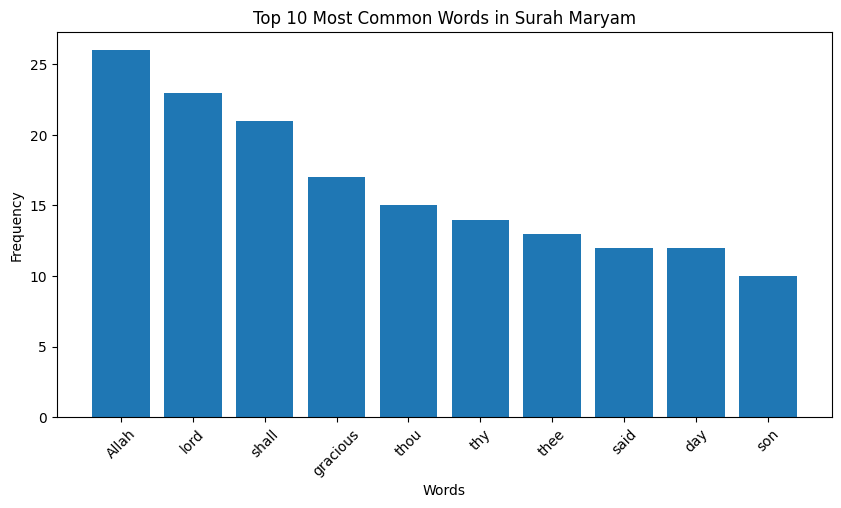

In [23]:
# Get the top 10 most frequent words
top_words = word_freq.most_common(10)

# Separate the words and their counts for plotting
words, counts = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Surah Maryam')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Generate the word cloud of the words in Surah Maryam along with the print of the 500 characters

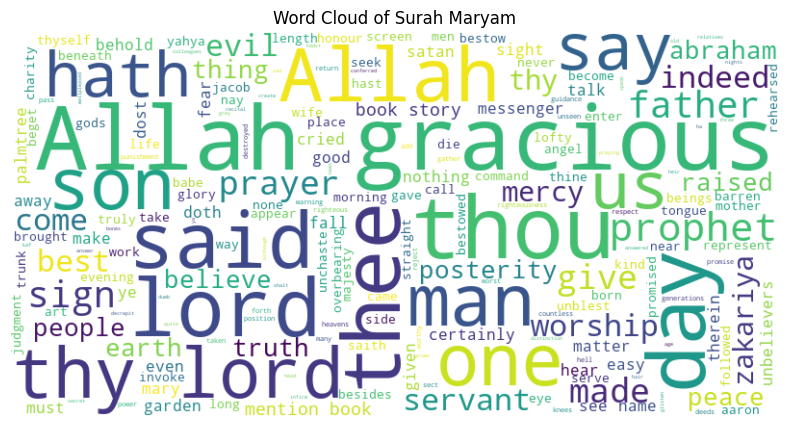

kaf ha ya sad recital mercy thy lord servant zakariya behold cried lord secret praying lord infirm indeed bones hair head doth glisten grey never unblest lord prayer thee fear relatives colleagues wife barren give heir thyself one truly represent represent posterity jacob make lord one thou art wellpleased prayer answered zakariya give thee good news son name shall yahya none name conferred distinction said lord shall son wife barren grown quite decrepit old age said thy lord saith easy indeed c


In [24]:
clean_text_joined = ' '.join(clean_words)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text_joined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Surah Maryam')
plt.show()

print(clean_text_joined[:500])  # Print the first 500 characters to ensure it's correct


# Count: The mention of Maryam (Mary by name) in the entire Quran

In [45]:
import pandas as pd

# Load the English Yusuf Ali translation dataset
quran_df = pd.read_csv('/Users/akhan/Documents/WGU Capstopne/archive/en.yusufali.csv')

# Convert the text to lowercase to make the search case-insensitive
quran_df['Text'] = quran_df['Text'].str.lower()

# Search for any references to "Mary" or "Maryam" in the Quran
mary_references = quran_df[quran_df['Text'].str.contains('mary|maryam')]

# Display the verses where "Mary" or "Maryam" is mentioned
print(mary_references[['Surah', 'Ayah', 'Text']])

# Count the number of occurrences of "Mary" or "Maryam"
mary_count = mary_references.shape[0]
print(f"\nTotal references to 'Mary' or 'Maryam': {mary_count}")


      Surah  Ayah                                               Text
93        2    87  we gave moses the book and followed him up wit...
259       2   253  those messengers we endowed with gifts, some a...
328       3    36  when she was delivered, she said: "o my lord! ...
329       3    37  right graciously did her lord accept her: he m...
334       3    42  behold! the angels said: "o mary! allah hath c...
335       3    43  "o mary! worship thy lord devoutly: prostrate ...
336       3    44  this is part of the tidings of the things unse...
337       3    45  behold! the angels said: "o mary! allah giveth...
648       4   156  that they rejected faith; that they uttered ag...
649       4   157  that they said (in boast), "we killed christ j...
663       4   171  o people of the book! commit no excesses in yo...
685       5    17  in blasphemy indeed are those that say that al...
714       5    46  and in their footsteps we sent jesus the son o...
740       5    72  they do blasphe

# Count: The mention of Maryam (Mary by name) in the entire chapter of Mary, Surah Maryam

In [51]:
import pandas as pd

# Load the English Yusuf Ali translation dataset
quran_df = pd.read_csv('/Users/akhan/Documents/WGU Capstopne/archive/en.yusufali.csv')

# Convert the text to lowercase to make the search case-insensitive
quran_df['Text'] = quran_df['Text'].str.lower()

# Filter the dataset for Surah 19 (Maryam)
surah_maryam_df = quran_df[quran_df['Surah'] == 19]

# Search for any references to "Mary" or "Maryam" in Surah Maryam
mary_references = surah_maryam_df[surah_maryam_df['Text'].str.contains('mary|maryam')]

# Display the verses where "Mary" or "Maryam" is mentioned in Surah Maryam
print(mary_references[['Surah', 'Ayah', 'Text']])

# Count the number of occurrences of "Mary" or "Maryam" in Surah Maryam
mary_count = mary_references.shape[0]
print(f"\nTotal references to 'Mary' or 'Maryam' in Surah Maryam: {mary_count}")

      Surah  Ayah                                               Text
2265     19    16  relate in the book (the story of) mary, when s...
2276     19    27  at length she brought the (babe) to her people...
2283     19    34  such (was) jesus the son of mary: (it is) a st...

Total references to 'Mary' or 'Maryam' in Surah Maryam: 3


# Save the cleaned data analysis findings of the Mother Maryam Project to a pdf file

In [33]:
# # Save the cleaned data analysis findings of the Mother Maryam Project to a pdf file

from fpdf import FPDF
import matplotlib.pyplot as plt
import os

# Create PDF class instance
pdf = FPDF()

# Add a page
pdf.add_page()

# Set title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Surah Maryam Analysis Report", ln=True, align='C')

# Add a section for word frequency findings
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Word Frequency Findings", ln=True, align='L')

# Add top 10 word frequency results to the PDF
pdf.set_font("Arial", size=12)
for word, freq in word_freq.most_common(10):
    pdf.cell(200, 10, txt=f"Word: {word}, Frequency: {freq}", ln=True)

# Add visualizations (word cloud and bar chart)
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Visualizations", ln=True, align='L')

# Save the word cloud and bar chart as images
wordcloud_path = "wordcloud.png"
barchart_path = "barchart.png"

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text_joined)
wordcloud.to_file(wordcloud_path)

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Surah Maryam')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig(barchart_path, bbox_inches='tight')
plt.close()

# Add the word cloud to the PDF
pdf.image(wordcloud_path, x=10, y=None, w=150)

# Add the bar chart to the PDF
pdf.image(barchart_path, x=10, y=None, w=150)

# Save the PDF file
pdf_output_path = "Chapter of Mary in the Quran.pdf" #Name the file what you'd like!
pdf.output(pdf_output_path)

print(f"PDF report has been saved as '{pdf_output_path}'")


PDF report has been saved as 'Chapter of Mary in the Quran.pdf'


# Save the cleaned data analysis findings of the Mother Maryam Project to a text file

In [34]:
# Save the cleaned data analysis findings of the Mother Maryam Project to a text file
with open('surah_maryam_cleaned.txt', 'w') as file:
    file.write(clean_text_joined)

print("Cleaned text has been exported to 'surah_maryam_cleaned.txt'") #Name the file what you'd like!


Cleaned text has been exported to 'surah_maryam_cleaned.txt'


# Closing Remarks:

# In this project we performed exploratory data analysis using the Holy Quran dataset and found:

  1. Our hypothesis has been established as a fact because the Holy Quran contains an entire chapter about Mary called Surah Maryam - Chapter 19
    
  2. Furthermore, Mary is metioned by name numerous times int the Holy Quran, as per our anlaysis report!
     
  3. Mary is revered by muslims across the globe as she is described as a chaste and honorable woman her story is beloved to all faith loving communities accross the globe!

# I hope this analysis decribes our goals and objectives as intended!